<a href="https://colab.research.google.com/github/PavanNayak1/PAVAN/blob/main/vegitable%20%26%20fruits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d asifhasan24/vegitablefruit

 98% 856M/869M [00:07<00:00, 143MB/s]
100% 869M/869M [00:07<00:00, 124MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/vegitablefruit.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Define constants
IMG_WIDTH, IMG_HEIGHT = 224, 224
NUM_CLASSES = 20
BATCH_SIZE = 32
EPOCHS = 50

# Define data directory
data_dir = '/content/VegetablesFruits'

# Data preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training')

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation')



Found 9599 images belonging to 20 classes.
Found 2387 images belonging to 20 classes.


In [9]:
# Load pre-trained VGG16 model without top layer
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))

# Freeze the layers of VGG16 model
for layer in vgg_model.layers:
    layer.trainable = False

# Flatten the output from VGG16 to prepare it for dense layers
x = vgg_model.output
x = Flatten()(x)

# Add dense layers
x = Dense(256, activation='relu')(x)
x = Dropout(0.1)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.1)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.1)(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

# Create the final model using VGG16's output and the added classifier
model = Model(inputs=vgg_model.input, outputs=predictions)



# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [10]:
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=2, min_delta = 0.001 , verbose=1)

# Train the model
history = model.fit(
    train_generator,
    # steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    # validation_steps=validation_generator.samples // BATCH_SIZE,
    callbacks=[early_stopping])



Epoch 1/50
300/300 [==============================] - 182s 602ms/step - loss: 1.9771 - accuracy: 0.3894 - val_loss: 1.1750 - val_accuracy: 0.6326
Epoch 2/50
300/300 [==============================] - 181s 602ms/step - loss: 1.0750 - accuracy: 0.6486 - val_loss: 0.9102 - val_accuracy: 0.6858
Epoch 3/50
300/300 [==============================] - 180s 601ms/step - loss: 0.8328 - accuracy: 0.7317 - val_loss: 0.8646 - val_accuracy: 0.7231
Epoch 4/50
300/300 [==============================] - 180s 601ms/step - loss: 0.6855 - accuracy: 0.7755 - val_loss: 0.8234 - val_accuracy: 0.7357
Epoch 5/50
300/300 [==============================] - 181s 603ms/step - loss: 0.6324 - accuracy: 0.7922 - val_loss: 0.7148 - val_accuracy: 0.7792
Epoch 6/50
300/300 [==============================] - 180s 602ms/step - loss: 0.5673 - accuracy: 0.8095 - val_loss: 0.7435 - val_accuracy: 0.7717
Epoch 7/50
300/300 [==============================] - 180s 600ms/step - loss: 0.5169 - accuracy: 0.8296 - val_loss: 0.6258 -

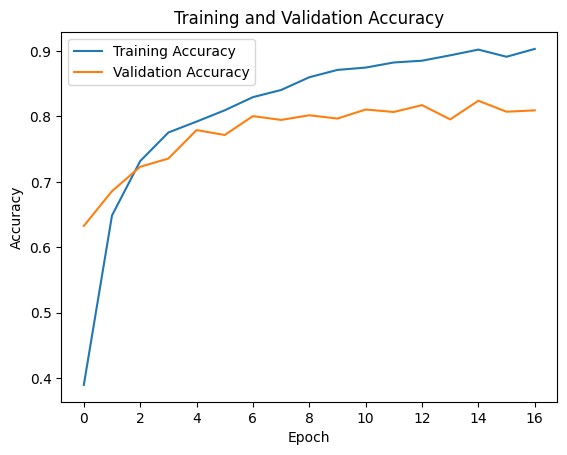

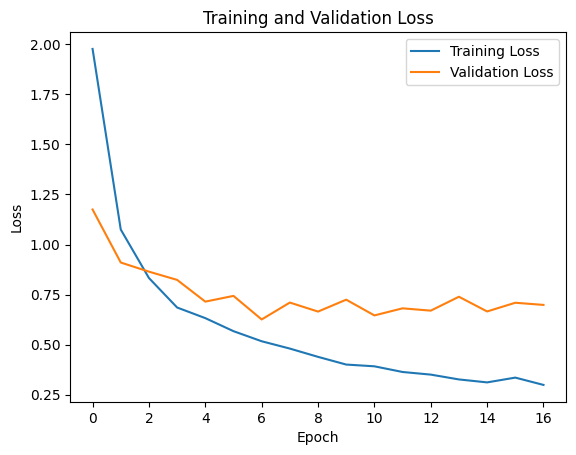

In [11]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()




In [12]:
# Save the model
model.save('image_classification_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.4 MB/s eta 0:00:00


In [21]:
with open('app.py', 'w') as f:
    f.write("""
import streamlit as st
import tensorflow as tf
from PIL import Image
import numpy as np

# Load the trained model
model_path = '/content/image_classification_model_1.h5'
model = tf.keras.models.load_model(model_path)

# Define the image size expected by the model
img_size = (224, 224)

# Streamlit app
st.title("Fruit and Vegetable Image Classifier")

uploaded_file = st.file_uploader("Choose an image...", type="jpg")

if uploaded_file is not None:
    # Display the uploaded image
    image = Image.open(uploaded_file)
    st.image(image, caption="Uploaded Image.", use_column_width=True)

    # Preprocess the image for the model
    img_array = np.array(image.resize(img_size))
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make prediction
    prediction = model.predict(img_array)

    # Display the prediction result
    class_names = ['Apple', 'Banana', 'Bell pepper', 'Carrot',  'Cucumber', 'Mango', 'Orange', 'Potato', 'Strawberry', 'Tomato', 'Rutten Apple', 'Rutten Banana', 'Rutten Bell pepper', 'Rutten Carrot',  'Rutten Cucumber', 'Rutten Mango', 'Rutten Orange', 'Rutten Potato', 'Rutten Strawberry', 'Rutten Tomato']
    predicted_class_index = np.argmax(prediction)
    predicted_class = class_names[predicted_class_index]
    confidence = prediction[0][predicted_class_index]
    st.write(f"Prediction: {predicted_class} (Confidence: {confidence:.2%})")
    st.write("Raw Prediction Value:", confidence)

""")


In [24]:
!wget -q -O - ipv4.icanhazip.com

34.125.105.145


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

[##................] | loadDep:strip-ansi: sill resolveWithNewModule wrap-ansi@


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.105.145:8501

npx: installed 22 in 1.907s
your url is: https://cyan-bugs-sit.loca.lt
2024-03-07 16:55:32.510044: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-07 16:55:32.510093: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-07 16:55:32.511414: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-07 16:55:33.513971: W tensorflow/compiler/tf2tensorrt/utils/py_ut